### Exploracion de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import anderson
from sklearn.preprocessing import MultiLabelBinarizer
from ydata_profiling import ProfileReport
%matplotlib inline


In [2]:
datos = pd.read_csv('movies.csv')
datos.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354,98,FALSE,...,20.880,1995-12-09,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938,110,FALSE,...,9.596,1993-10-15,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007,121,NaN,...,100.003,1977-05-25,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536,100,NaN,...,134.435,2003-05-30,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716,142,FALSE,...,58.751,1994-07-06,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


### Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto de datos.

In [3]:
datos.iloc[0, :]

id                                                                           5
budget                                                                 4000000
genres                                                            Crime|Comedy
homePage                             https://www.miramax.com/movie/four-rooms/
productionCompany                                         Miramax|A Band Apart
productionCompanyCountry                                                 US|US
productionCountry                                     United States of America
revenue                                                                4257354
runtime                                                                     98
video                                                                    FALSE
director                     Allison Anders|Alexandre Rockwell|Robert Rodri...
actors                       Tim Roth|Jennifer Beals|Antonio Banderas|Valer...
actorsPopularity             22.225|23.519|17.816|19

In [4]:
print(datos.dtypes)

id                            object
budget                        object
genres                        object
homePage                      object
productionCompany             object
productionCompanyCountry      object
productionCountry             object
revenue                        int64
runtime                        int64
video                         object
director                      object
actors                        object
actorsPopularity              object
actorsCharacter               object
originalTitle                 object
title                         object
originalLanguage              object
popularity                   float64
releaseDate                   object
voteAvg                      float64
voteCount                    float64
genresAmount                 float64
productionCoAmount           float64
productionCountriesAmount    float64
actorsAmount                 float64
castWomenAmount               object
castMenAmount                 object
d

In [5]:
profile = ProfileReport(datos)
profile

Los datos poseen información variada que sirve para identificar una película, entre estos valores está, su identificador único, su popularidad, su presupuesto, el elenco, su idioma original, entre otros valores representativos de una película.  
Así mismo se encontrar 3 tipos de datos, object(string), floats e ints, correspondiend a 15 columans de texto, 9 numéricas, 2 categoricas y 1 de tipo fecha (dateTime).
Se cuenta con 27 variables y un total de 10001 entradas, de las cuales hay 3.2% que no cuentan con datos, estas se reparten de la siguiente manera:
- homePage
- productionCompany
- productionCompanyCountry
- productionCountry
- video

También se puede observar que las columnas no estan balanceadas, siendo video la columna más desbalanceada, con 95.3% de desbalance, seguida por originalLanguage, con 71.4%.  
Se detectó un sesgo alto en al columna de popularity, y valores en ceros en revenue y actorsAmount.
Por último se encontró que no hay ninguna fila duplicada, lo que nos indica que todas y cada una de las filas representan datos de péliculas distintas entre ellas.


### Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta)

In [6]:
print(datos.dtypes)


id                            object
budget                        object
genres                        object
homePage                      object
productionCompany             object
productionCompanyCountry      object
productionCountry             object
revenue                        int64
runtime                        int64
video                         object
director                      object
actors                        object
actorsPopularity              object
actorsCharacter               object
originalTitle                 object
title                         object
originalLanguage              object
popularity                   float64
releaseDate                   object
voteAvg                      float64
voteCount                    float64
genresAmount                 float64
productionCoAmount           float64
productionCountriesAmount    float64
actorsAmount                 float64
castWomenAmount               object
castMenAmount                 object
d

In [7]:
datos.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,popularity,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount
0,5,4000000,Crime|Comedy,https://www.miramax.com/movie/four-rooms/,Miramax|A Band Apart,US|US,United States of America,4257354,98,FALSE,...,20.880,1995-12-09,5.7,2077.0,2.0,2.0,1.0,25.0,15,9
1,6,21000000,Action|Thriller|Crime,NaN,Universal Pictures|Largo Entertainment|JVC,US|US|JP,Japan|United States of America,12136938,110,FALSE,...,9.596,1993-10-15,6.5,223.0,3.0,3.0,2.0,15.0,3,9
2,11,11000000,Adventure|Action|Science Fiction,http://www.starwars.com/films/star-wars-episod...,Lucasfilm|20th Century Fox,US|US,United States of America,775398007,121,NaN,...,100.003,1977-05-25,8.2,16598.0,3.0,2.0,1.0,105.0,5,62
3,12,94000000,Animation|Family,http://movies.disney.com/finding-nemo,Pixar,US,United States of America,940335536,100,NaN,...,134.435,2003-05-30,7.8,15928.0,2.0,1.0,1.0,24.0,5,18
4,13,55000000,Comedy|Drama|Romance,NaN,Paramount|The Steve Tisch Company,US|,United States of America,677387716,142,FALSE,...,58.751,1994-07-06,8.5,22045.0,3.0,2.0,1.0,76.0,18,48


In [8]:
datos["actorsPopularity"]

0        22.225|23.519|17.816|19.893|9.027|7.147|7.769|...
1        9.008|6.383|10.757|18.295|11.772|14.777|9.669|...
2        11.881|24.542|14.434|10.651|6.888|5.811|1.432|...
3        9.79|8.084|8.538|33.379|11.733|11.866|8.141|12...
4        33.297|13.246|6.748|6.402|13.189|10.974|10.259...
                               ...                        
9996      18.185|0.828|0.6|0.6|0.6|1.102|3.069|0.6|0.6|0.6
9997                     1.55|0.84|0.6|0.6|0.6|0.6|0.6|0.6
9998     0.6|0.98|0.6|0.6|0.6|0.6|0.6|0.6|1.4|0.6|0.6|1...
9999                                                   NaN
10000         7.402|3.103|8.74|7.158|2.951|0.6|1.214|9.197
Name: actorsPopularity, Length: 10001, dtype: object

#### Tipo de variable
- id: cualitativa ordinal
- budget: cuantitativa continua
- genres: cualitativa nominal
- homePage: cualitativa nominal
- production Company: cualitativa nominal
- production company country: cualitativa nominal
- production country: cualitativa nominal
- revenue: cuantitativa discreta
- runtime: cuantitativa discreta
- video: cualitativa nominal
- director: cualitativa nominal
- actores: cualitativa nominal
- actorsPopularity: cualitativa ordinal 
- originalTitle: cualitativa nominal
- title: cualitativa nominal
- originalLanguage: cualitativa nominal
- popularity: cualitativa ordinal
- releaseDate: cualitativa ordinal
- voteAvg: cualitativa ordinal
- voteCount: cuantitativa discreta
- genresAmount: cuantitativa discreta
- productioncoAmount: cuantitativa discreta
- productionCountrysAmount: cuantitativa discreta
- actorsAmount: cuantitativa discreta
- cast women Amount: cuantitativa discreta
- castMenAmount: cuantitativa discreta

### Limpiando la data

In [9]:
nulos = datos.isnull().sum()
print(nulos)

id                              0
budget                          0
genres                         53
homePage                     5807
productionCompany             457
productionCompanyCountry     1280
productionCountry             233
revenue                         0
runtime                         0
video                         486
director                       74
actors                         80
actorsPopularity               87
actorsCharacter                47
originalTitle                   2
title                           2
originalLanguage                2
popularity                      2
releaseDate                     2
voteAvg                         2
voteCount                       2
genresAmount                    2
productionCoAmount              2
productionCountriesAmount       2
actorsAmount                    2
castWomenAmount                 2
castMenAmount                   2
dtype: int64


Debido a que la cantidad de datos nulos en las siguientes columnas:
- productionCompany
- productionCompanyCountry
- productionCountry
- video
- homePage
- actors
- actorsPopularity
- actorsCharacter
- originalLanguage
- genresAmount
- productionCoAmount
- productionCountriesAmount

es baja y no se puede obtener una media (por el tipo valor que representa) se optó por eliminar las columnas, ya que también dichos datos no nos ayudarán en el reporte final.
Así mismo se retirará el id del dataset, ya que no ofrece información útil para el análisis.

In [10]:
datosClean1 = datos.drop(["id", "homePage", "productionCompany", "productionCompanyCountry", "productionCountry", "video", "homePage", "actors", "actorsPopularity", "actorsCharacter", "originalLanguage", "genresAmount", "productionCoAmount", "productionCountriesAmount", "title"], axis=1)
datosClean1.head()

,budget,genres,revenue,runtime,director,originalTitle,popularity,releaseDate,voteAvg,voteCount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,Crime|Comedy,4257354,98,Allison Anders|Alexandre Rockwell|Robert Rodri...,Four Rooms,20.880,1995-12-09,5.7,2077.0,25.0,15,9
1,21000000,Action|Thriller|Crime,12136938,110,Stephen Hopkins,Judgment Night,9.596,1993-10-15,6.5,223.0,15.0,3,9
2,11000000,Adventure|Action|Science Fiction,775398007,121,George Lucas,Star Wars,100.003,1977-05-25,8.2,16598.0,105.0,5,62
3,94000000,Animation|Family,940335536,100,Andrew Stanton,Finding Nemo,134.435,2003-05-30,7.8,15928.0,24.0,5,18
4,55000000,Comedy|Drama|Romance,677387716,142,Robert Zemeckis,Forrest Gump,58.751,1994-07-06,8.5,22045.0,76.0,18,48


In [11]:
nulos = datosClean1.isnull().sum()
print(nulos)

budget              0
genres             53
revenue             0
runtime             0
director           74
originalTitle       2
popularity          2
releaseDate         2
voteAvg             2
voteCount           2
actorsAmount        2
castWomenAmount     2
castMenAmount       2
dtype: int64


Casos a evaluar
- genres
- director
- originalTitle
- popularity
- releaseDate
- voteAvg
- voteCount
- actorsAmount
- castWomenAmount
- castMenAmount

In [12]:
datosClean1[datosClean1["originalTitle"].isnull()]


,budget,genres,revenue,runtime,director,originalTitle,popularity,releaseDate,voteAvg,voteCount,actorsAmount,castWomenAmount,castMenAmount
901,6000000,Adventure|Comedy|Family|Fantasy|Romance,42000000,175,Michael Anderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
902,Around the World in Eighty Days,Around the World in Eighty Days,343,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
datosClean2 = datosClean1.dropna(subset=["originalTitle"])
datosClean2.head()

,budget,genres,revenue,runtime,director,originalTitle,popularity,releaseDate,voteAvg,voteCount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,Crime|Comedy,4257354,98,Allison Anders|Alexandre Rockwell|Robert Rodri...,Four Rooms,20.880,1995-12-09,5.7,2077.0,25.0,15,9
1,21000000,Action|Thriller|Crime,12136938,110,Stephen Hopkins,Judgment Night,9.596,1993-10-15,6.5,223.0,15.0,3,9
2,11000000,Adventure|Action|Science Fiction,775398007,121,George Lucas,Star Wars,100.003,1977-05-25,8.2,16598.0,105.0,5,62
3,94000000,Animation|Family,940335536,100,Andrew Stanton,Finding Nemo,134.435,2003-05-30,7.8,15928.0,24.0,5,18
4,55000000,Comedy|Drama|Romance,677387716,142,Robert Zemeckis,Forrest Gump,58.751,1994-07-06,8.5,22045.0,76.0,18,48


In [14]:
nulos = datosClean2.isnull().sum()
print(nulos)

budget              0
genres             53
revenue             0
runtime             0
director           74
originalTitle       0
popularity          0
releaseDate         0
voteAvg             0
voteCount           0
actorsAmount        0
castWomenAmount     0
castMenAmount       0
dtype: int64


Se retiraron las 2 filas que poseían valores nulos, se decidió retirar dichas filas ya que su cantidad es muy baja con respecto a la cantidad de datos en la data, por lo que no debería afectar el conjunto total. Además dichas filas poseían casi todas las columanas sin valores.

In [15]:
datosClean2[datosClean2["genres"].isnull()]

,budget,genres,revenue,runtime,director,originalTitle,popularity,releaseDate,voteAvg,voteCount,actorsAmount,castWomenAmount,castMenAmount
4652,0,NaN,0,90,Harold Trompetero,El paseo,74.413,2010-12-25,6.5,24.0,88278.0,El paseo,El paseo
4894,0,NaN,0,90,Jorge Fernando,"Sexo, Amor e Traição",11.466,2004-01-02,5.3,18.0,4.0,6,131805
4940,0,NaN,0,80,Esteban Echeverría,La máquina que hace estrellas,11.847,2012-08-30,4.1,5.0,138550.0,La máquina que hace estrellas,The Star Making Machine
5249,0,NaN,0,61,Amir Assadi,Lesbian Love,42.113,2012-01-08,8.1,19.0,204450.0,Lesbian Love,Lesbian Love
5660,0,NaN,0,62,Katina Medina Mora,Lu-To,20.650,2013-11-15,5.3,14.0,1.0,1,265329
5672,0,NaN,0,0,Christopher Hool,Cambio de Ruta,22.319,2014-05-23,6.0,18.0,267802.0,Cambio de Ruta,Cambio de Ruta
5831,0,NaN,0,0,NaN,Avatar:Production Materials,35.954,2009-12-18,8.5,2.0,287004.0,Avatar:Production Materials,Avatar:Production Materials
6626,0,NaN,0,13,Jeremy David White,The First Hope,4.627,2013-02-20,6.5,2.0,374338.0,The First Hope,The First Hope
6746,0,NaN,0,129,NaN,Gravity Falls: Six Strange Tales,38.058,2013-10-15,9.1,13.0,385281.0,Gravity Falls: Six Strange Tales,Gravity Falls: Six Strange Tales
6751,0,NaN,0,12,NaN,Dragon Ball Kami BEST [Bonus DVD],13.276,2016-02-24,9.8,3.0,385522.0,Dragon Ball Kami BEST [Bonus DVD],Dragon Ball Kami BEST [Bonus DVD]


Podemos observar que los datos restantes que poseen un null en genres no poseen coherencia, ya que no existen películas que posean ese orden de actores, además hay varias columnas que poseen datos sin coherencia, por lo que se eliminarán del dataset

In [16]:
datosClean3 = datosClean2.dropna(subset=["genres"])
datosClean3.head()

,budget,genres,revenue,runtime,director,originalTitle,popularity,releaseDate,voteAvg,voteCount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,Crime|Comedy,4257354,98,Allison Anders|Alexandre Rockwell|Robert Rodri...,Four Rooms,20.880,1995-12-09,5.7,2077.0,25.0,15,9
1,21000000,Action|Thriller|Crime,12136938,110,Stephen Hopkins,Judgment Night,9.596,1993-10-15,6.5,223.0,15.0,3,9
2,11000000,Adventure|Action|Science Fiction,775398007,121,George Lucas,Star Wars,100.003,1977-05-25,8.2,16598.0,105.0,5,62
3,94000000,Animation|Family,940335536,100,Andrew Stanton,Finding Nemo,134.435,2003-05-30,7.8,15928.0,24.0,5,18
4,55000000,Comedy|Drama|Romance,677387716,142,Robert Zemeckis,Forrest Gump,58.751,1994-07-06,8.5,22045.0,76.0,18,48


In [17]:
nulos = datosClean3.isnull().sum()
print(nulos)

budget              0
genres              0
revenue             0
runtime             0
director           50
originalTitle       0
popularity          0
releaseDate         0
voteAvg             0
voteCount           0
actorsAmount        0
castWomenAmount     0
castMenAmount       0
dtype: int64


In [18]:
datosClean3[datosClean3["director"].isnull()]

,budget,genres,revenue,runtime,director,originalTitle,popularity,releaseDate,voteAvg,voteCount,actorsAmount,castWomenAmount,castMenAmount
3119,0,Thriller|Romance|Drama,0,93,NaN,Poison Ivy: The New Seduction,15.217,1997-10-20,4.8,64.0,15.0,7,5
4040,0,Action|Animation|Family|Science Fiction,0,79,NaN,Spider-Man: The Ultimate Villain Showdown,13.013,2002-08-11,6.8,12.0,5.0,49131,Spider-Man: The Ultimate Villain Showdown
4561,0,Documentary,0,63,NaN,X-Men: Production Scrapbook,32.753,2003-11-02,6.0,25.0,48.0,11,25
5596,0,Documentary,0,87,NaN,"Pablo Escobar, ángel o demonio",21.562,2008-02-01,6.6,14.0,1.0,257909,"Pablo Escobar, ángel o demonio"
5619,0,TV Movie|Documentary,0,43,NaN,Marvel Studios: Assembling a Universe,21.078,2014-03-18,7.0,124.0,60.0,8,45
5830,0,Documentary,0,0,NaN,Avatar: Scene Deconstruction,48.556,2009-12-18,8.5,2.0,0.0,287003,Avatar: Scene Deconstruction
5998,0,Animation,0,0,NaN,Spongebob Squarepants: It Came from Goo Lagoon,10.566,2014-11-07,6.8,6.0,0.0,0,303110
6243,0,Documentary,0,54,NaN,Cristiano Ronaldo: World at His Feet,11.884,2014-06-01,7.4,36.0,0.0,334616,Cristiano Ronaldo: World at His Feet
6703,0,Documentary,0,24,NaN,Becoming Mayan: Creating Apocalypto,11.922,2007-05-22,7.9,25.0,9.0,0,5
6733,0,Animation,0,88,NaN,The Simpsons: Viva Los Simpsons,60.883,2005-01-01,7.9,15.0,0.0,383887,The Simpsons: Viva Los Simpsons


Se observaron que las filas que poseían datos nulos en la columna de director, poseen datos erróneos en las demás columnas, dichos datos no ofrecen ningún valor para el conjunto en general, por esto se decidió eliminar dichas filas del conjunto de datos.

In [19]:
datosClean3 = datosClean3.dropna(subset=["director"])
datosClean3.head()

,budget,genres,revenue,runtime,director,originalTitle,popularity,releaseDate,voteAvg,voteCount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,Crime|Comedy,4257354,98,Allison Anders|Alexandre Rockwell|Robert Rodri...,Four Rooms,20.880,1995-12-09,5.7,2077.0,25.0,15,9
1,21000000,Action|Thriller|Crime,12136938,110,Stephen Hopkins,Judgment Night,9.596,1993-10-15,6.5,223.0,15.0,3,9
2,11000000,Adventure|Action|Science Fiction,775398007,121,George Lucas,Star Wars,100.003,1977-05-25,8.2,16598.0,105.0,5,62
3,94000000,Animation|Family,940335536,100,Andrew Stanton,Finding Nemo,134.435,2003-05-30,7.8,15928.0,24.0,5,18
4,55000000,Comedy|Drama|Romance,677387716,142,Robert Zemeckis,Forrest Gump,58.751,1994-07-06,8.5,22045.0,76.0,18,48


In [20]:
nulos = datosClean3.isnull().sum()
print(nulos)

budget             0
genres             0
revenue            0
runtime            0
director           0
originalTitle      0
popularity         0
releaseDate        0
voteAvg            0
voteCount          0
actorsAmount       0
castWomenAmount    0
castMenAmount      0
dtype: int64


In [21]:
finalData = datosClean3
finalData.head()

,budget,genres,revenue,runtime,director,originalTitle,popularity,releaseDate,voteAvg,voteCount,actorsAmount,castWomenAmount,castMenAmount
0,4000000,Crime|Comedy,4257354,98,Allison Anders|Alexandre Rockwell|Robert Rodri...,Four Rooms,20.880,1995-12-09,5.7,2077.0,25.0,15,9
1,21000000,Action|Thriller|Crime,12136938,110,Stephen Hopkins,Judgment Night,9.596,1993-10-15,6.5,223.0,15.0,3,9
2,11000000,Adventure|Action|Science Fiction,775398007,121,George Lucas,Star Wars,100.003,1977-05-25,8.2,16598.0,105.0,5,62
3,94000000,Animation|Family,940335536,100,Andrew Stanton,Finding Nemo,134.435,2003-05-30,7.8,15928.0,24.0,5,18
4,55000000,Comedy|Drama|Romance,677387716,142,Robert Zemeckis,Forrest Gump,58.751,1994-07-06,8.5,22045.0,76.0,18,48


#### corrigiendo los tipos de datos

In [22]:
print(finalData.dtypes)

budget              object
genres              object
revenue              int64
runtime              int64
director            object
originalTitle       object
popularity         float64
releaseDate         object
voteAvg            float64
voteCount          float64
actorsAmount       float64
castWomenAmount     object
castMenAmount       object
dtype: object


In [23]:
finalData[["budget"]] = finalData[["budget"]].astype("float64")
finalData[["castWomenAmount"]] = finalData[["castWomenAmount"]].astype("float64")

# Posee datos que no son numericos
finalData['castMenAmount'] = pd.to_numeric(finalData['castMenAmount'], errors='coerce')
finalData.dropna(subset=['castMenAmount'], inplace=True)
print(finalData.dtypes)

budget             float64
genres              object
revenue              int64
runtime              int64
director            object
originalTitle       object
popularity         float64
releaseDate         object
voteAvg            float64
voteCount          float64
actorsAmount       float64
castWomenAmount    float64
castMenAmount      float64
dtype: object


Habiendo hecho todo lo anterior los datos quedan listos para su análisis, ya que se eliminaron todas las inconsistencias del conjunto.

In [24]:
profile = ProfileReport(finalData)
profile

### Inciso 3
Investigue si las variables cuantitativas tienen una distribución normal
Budget, runtime, vote count, genres amount, production amount, production countrys amount, actors amount, cast women amount, cast men amount. 


In [25]:
#Budget
bud= finalData["budget"].dropna().values
result1 = anderson(bud)
# Compara el estadístico de prueba con los valores críticos para tomar una decisión
if result1.statistic < result1.critical_values[2]:
    print("Los datos de budget parecen seguir una distribución normal")
else:
    print("Los datos de budget no parecen seguir una distribución normal")
#Revenue   
rev= finalData["revenue"].dropna().values
result2 = anderson(rev)
if result2.statistic < result2.critical_values[2]:
    print("Los datos de revenue parecen seguir una distribución normal")
else:
    print("Los datos de revenue no parecen seguir una distribución normal")

#Runtime
rtime= finalData["runtime"].dropna().values
result3 = anderson(rtime)
if result3.statistic < result3.critical_values[2]:
    print("Los datos de runtime parecen seguir una distribución normal")
else:
    print("Los datos de runtime no parecen seguir una distribución normal")
    
#Vote Count
votc= finalData["voteCount"].dropna().values
result4 = anderson(votc)
if result4.statistic < result4.critical_values[2]:
    print("Los datos de Vote Count parecen seguir una distribución normal")
else:
    print("Los datos de Vote Count no parecen seguir una distribución normal")

#Actors amount
actAm= finalData["actorsAmount"].dropna().values
result5 = anderson(actAm)
if result5.statistic < result5.critical_values[2]:
    print("Los datos de Actors Amount parecen seguir una distribución normal")
else:
    print("Los datos de Actors Amount no parecen seguir una distribución normal")

#Cast Women Amount
womA= finalData["castWomenAmount"].dropna().values
result6 = anderson(womA)
if result6.statistic < result6.critical_values[2]:
    print("Los datos de cast Women Amount parecen seguir una distribución normal")
else:
    print("Los datos de cast Women Amount no parecen seguir una distribución normal")
    
#Cast Men Amount
menA= finalData["castMenAmount"].dropna().values
result7 = anderson(menA)
if result7.statistic < result7.critical_values[2]:
    print("Los datos de cast Men Amount parecen seguir una distribución normal")
else:
    print("Los datos de cast Men Amount no parecen seguir una distribución normal")

Los datos de budget no parecen seguir una distribución normal
Los datos de revenue no parecen seguir una distribución normal
Los datos de runtime no parecen seguir una distribución normal
Los datos de Vote Count no parecen seguir una distribución normal
Los datos de Actors Amount no parecen seguir una distribución normal
Los datos de cast Women Amount no parecen seguir una distribución normal
Los datos de cast Men Amount no parecen seguir una distribución normal


### 
Se realizó una prueba anderson para verificar si aquellas variables cuantitativas cuentan con una distribución normal, y al comparar los estadísticos podemos observar que ninguna de las 7 variables tiene una distribución normal. 


### Inciso 3 parte 2
Y haga una tabla de frecuencias de las variables cualitativas.

In [26]:
#Primero separamos los generos en diferentes columnas
mlb = MultiLabelBinarizer()
generos_binarios = mlb.fit_transform(finalData['genres'].str.split('|'))
df_generos_binarios = pd.concat([finalData, pd.DataFrame(generos_binarios, columns=mlb.classes_)], axis=1)
df_generos_binarios = df_generos_binarios.drop('genres', axis=1)
#print(df_generos_binarios.head())


In [32]:
#genres
columnas_generos = df_generos_binarios.columns[17:]
gen = df_generos_binarios[columnas_generos].sum(axis=0).sort_values(ascending=False).reset_index()
gen.columns = ['Género', 'Frecuencia']
print("Tabla de frecuencias de los géneros de las películas")
print(gen)
print("")
#Director
print("Tabla de frecuencias de los directores de las películas")
df_expanded = finalData['director'].apply(pd.Series).stack().reset_index(level=1, drop=True).reset_index(name='director')
tabla2 = df_expanded['director'].value_counts().reset_index()
tabla2.columns = ['Director', 'Frecuencia']
print(tabla2)
print("")

#Popularity
pop = finalData["popularity"]
tabla3 = pop.value_counts().reset_index()
tabla3.columns = ["Valor", "Frecuencia"]
tabla3 = tabla3.sort_values(by="Valor")
tabla3 = tabla3.reset_index(drop=True)
print("Tabla de frecuencias de la popularidad de las películas")
print(tabla3)
print("")

#release date
relDa = finalData["releaseDate"]
tabla4 = relDa.value_counts().reset_index()
tabla4.columns = ["Valor", "Frecuencia"]
tabla4 = tabla4.sort_values(by="Valor")
tabla4 = tabla4.reset_index(drop=True)
print("Tabla de frecuencias de la fecha de lanzamiento de las películas")
print(tabla4)

#Vote average
voteav = finalData["voteAvg"]
tabla5 = voteav.value_counts().reset_index()
tabla5.columns = ["Valor", "Frecuencia"]
tabla5 = tabla5.sort_values(by="Valor")
tabla5 = tabla5.reset_index(drop=True)
print("Tabla de frecuencias del promedio de votos de las películas")
print(tabla5)

#original title
ort = finalData["originalTitle"]
tabla6 = ort.value_counts().reset_index()
tabla6.columns = ["Valor", "Frecuencia"]
tabla6 = tabla6.sort_values(by="Valor")
tabla6 = tabla6.reset_index(drop=True)
print("Tabla de frecuencias del nombre original de las películas")
print(tabla6)


Tabla de frecuencias de los géneros de las películas
             Género  Frecuencia
0             Drama      3765.0
1          Thriller      2556.0
2            Horror      1490.0
3           Romance      1412.0
4            Family      1391.0
5           Fantasy      1273.0
6   Science Fiction      1261.0
7           Mystery       802.0
8           History       405.0
9             Music       310.0
10              War       274.0
11         TV Movie       264.0
12      Documentary       258.0
13          Western       120.0

Tabla de frecuencias de los directores de las películas
                  Director  Frecuencia
0         Steven Spielberg          29
1           Clint Eastwood          28
2             Ridley Scott          23
3        Steven Soderbergh          19
4          Martin Scorsese          19
...                    ...         ...
5228       Hirofumi Kurita           1
5229    Florian Gottschick           1
5230  Peta Rivero y Hornos           1
5231            Kevi

### 
Podemos ver en la tabla de frecuencias de los géneros que las películas presentadas varían entre 18 géneros de películas. Y entre 73 promedio de votos distintos. Mientras que las variables como la popularidad, la fecha de lanzamiento y el nombre original de las películas son datos en su mayoría, únicos.


### Preguntas

#### ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [33]:
ordenado = finalData.sort_values(by='budget', ascending=False)
print("Las 10 películas con más presupuesto:")
print(ordenado.head(10))


Las 10 películas con más presupuesto:
           budget                                    genres     revenue  \
716   380000000.0                  Adventure|Action|Fantasy  1045713802   
4711  365000000.0          Action|Adventure|Science Fiction  1405403694   
5953  356000000.0          Adventure|Science Fiction|Action  2797800564   
4954  300000000.0  Action|Adventure|Fantasy|Science Fiction   657924295   
163   300000000.0                  Adventure|Fantasy|Action   961000000   
5954  300000000.0          Adventure|Action|Science Fiction  2046239637   
607   270000000.0          Science Fiction|Action|Adventure   391081192   
7135  260000000.0                Adventure|Family|Animation  1667635327   
3792  260000000.0                          Animation|Family   592461732   
280   258000000.0                  Fantasy|Action|Adventure   890871626   

      runtime                   director  \
716       137               Rob Marshall   
4711      141                Joss Whedon   
5953

### 
Podemos ver que las 10 películas con más presupuesto son aquellas con los id: 
716, 4711, 5953, 4954, 163, 5954, 607, 7135, 3792, 280.


#### ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [34]:
ordenado2 = finalData.sort_values(by='revenue', ascending=False)
print("Las 10 películas con más ingresos:")
print(ordenado2.head(10))


Las 10 películas con más ingresos:
           budget                                     genres     revenue  \
3211  237000000.0   Action|Adventure|Fantasy|Science Fiction  2847246203   
5953  356000000.0           Adventure|Science Fiction|Action  2797800564   
307   200000000.0                              Drama|Romance  2187463944   
4948  245000000.0   Action|Adventure|Science Fiction|Fantasy  2068223624   
5954  300000000.0           Adventure|Action|Science Fiction  2046239637   
4915  150000000.0  Action|Adventure|Science Fiction|Thriller  1671713208   
7135  260000000.0                 Adventure|Family|Animation  1667635327   
9050  200000000.0           Action|Adventure|Science Fiction  1631853496   
3398  220000000.0           Science Fiction|Action|Adventure  1518815515   
5088  190000000.0            Action|Thriller|Crime|Adventure  1515047671   

      runtime                 director                 originalTitle  \
3211      162            James Cameron                  

### 
Podemos ver que las 10 películas que más ingresos tuvieron son aquellas con los id: 
3211, 5953, 307, 4948, 5954, 4915, 7135, 9050, 3398, 5088.


#### ¿Cuál es la película que más votos tuvo?

In [35]:
ordenado3 = finalData.sort_values(by='voteCount', ascending=False)
print("La película que más votos tuvo es:")
print(ordenado3.head(1))

La película que más votos tuvo es:
           budget                            genres    revenue  runtime  \
3512  160000000.0  Action|Science Fiction|Adventure  825532764      148   

               director originalTitle  popularity releaseDate  voteAvg  \
3512  Christopher Nolan     Inception     200.943  2010-07-15      8.4   

      voteCount  actorsAmount  castWomenAmount  castMenAmount  
3512    30788.0          51.0             12.0           29.0  


### 
Podemos ver que la película que más votos tuvo es Inception con un total de 30,788 votos.


#### ¿Cuál es la peor película de acuerdo a los votos?

In [36]:
idpeorpeli = finalData['voteCount'].idxmin()
peorpeli = finalData.loc[idpeorpeli, ['originalTitle', 'voteCount']]
print("La peor película según los votos")
print(peorpeli)

La peor película según los votos
originalTitle    La Mera Reyna del Sur
voteCount                          1.0
Name: 4794, dtype: object


### 
Podemos ver que la película con menos votos es "La Mera Reyna del Sur" con solo un voto.


#### ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas?

Número de películas por año:
releaseYear
1902      1
1920      1
1921      1
1922      1
1925      2
       ... 
2018    612
2019    592
2020    515
2021    786
2022      7
Name: count, Length: 99, dtype: int64

Año con más películas:
Año: 2021, Cantidad: 786


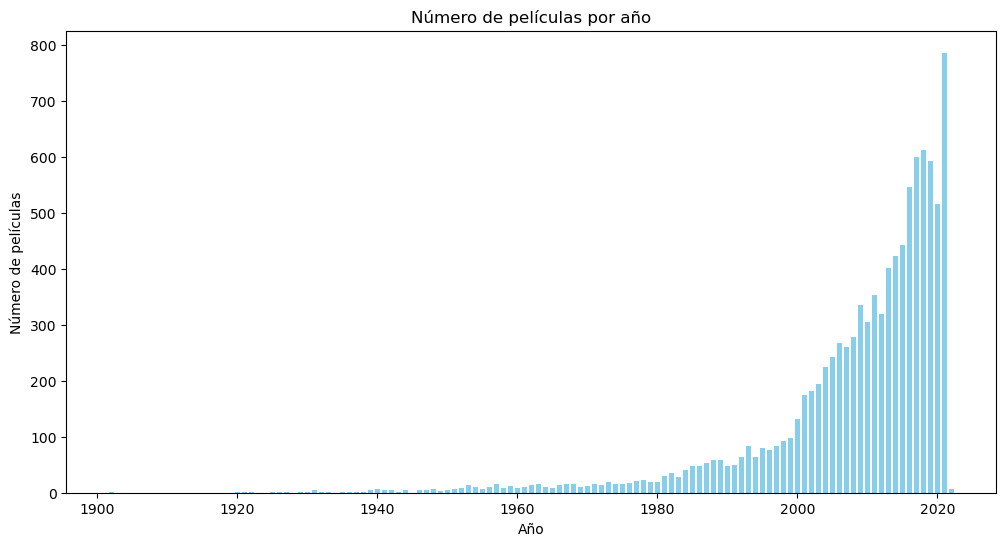

In [37]:
finalData['releaseYear'] = pd.to_datetime(finalData['releaseDate']).dt.year
conteo= finalData['releaseYear'].value_counts().sort_index()
anio = conteo.idxmax()
cantidad_maxima = conteo.max()
print("Número de películas por año:")
print(conteo)
print("\nAño con más películas:")
print(f"Año: {anio}, Cantidad: {cantidad_maxima}")
plt.figure(figsize=(12, 6))
plt.bar(conteo.index, conteo.values, color='skyblue')
plt.title('Número de películas por año')
plt.xlabel('Año')
plt.ylabel('Número de películas')
plt.show()

### 
Podemos ver que el año en el que se hicieron más películas fue en el 2021 con 786 películas 


#### ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos? Represéntelo usando un gráfico
Como se puede ver en la tabla de frecuencias del inciso 3, el género principal que predomina es el de drama, presente en 3765 películas.  


La tabla de frecuencias de los géneros de las 20 pelis más recientes es:
        Género  Frecuencia
0        Drama         8.0
1      Romance         4.0
2      Fantasy         4.0
3     Thriller         3.0
4      Mystery         2.0
5       Horror         2.0
6        Crime         1.0
7       Family         1.0
8  Documentary         1.0



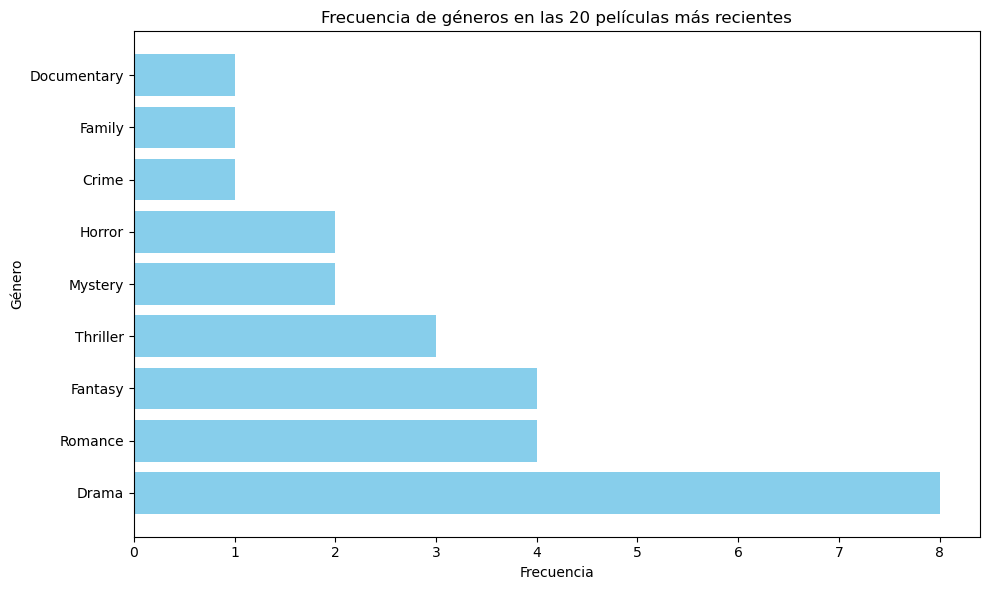

In [48]:
finalData['releaseDate'] = pd.to_datetime(finalData['releaseDate'])
recent_movies = finalData.sort_values(by='releaseDate', ascending=False).head(20)
#print(recent_movies)
mlb = MultiLabelBinarizer()
generos_binarios = mlb.fit_transform(recent_movies['genres'].str.split('|'))
generosBinarios = pd.concat([recent_movies, pd.DataFrame(generos_binarios, columns=mlb.classes_)], axis=1)
generosBinarios = generosBinarios.drop('genres', axis=1)
#print(generosBinarios)
generos = generosBinarios.columns[17:]
gen2 = generosBinarios[generos].sum(axis=0).sort_values(ascending=False).reset_index()
gen2.columns = ['Género', 'Frecuencia']
print("La tabla de frecuencias de los géneros de las 20 pelis más recientes es:")
print(gen2)
print("")
plt.figure(figsize=(10, 6))
plt.barh(gen['Género'], gen['Frecuencia'], color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Frecuencia de géneros en las 20 películas más recientes')
plt.tight_layout()
plt.show()

### 
El género principal de las 20 películas más recientes es el drama, ya que 8 de esas 20 películas son de ese género. 


#### ¿Las películas de qué genero principal obtuvieron mayores ganancias?

In [58]:
finalData['genres'] = finalData['genres'].str.split('|')

# Utilizar explode para dividir las listas en filas individuales
finalData = finalData.explode('genres')

# Calcular la ganancia total por género
ganancia_por_genero = finalData.groupby('genres')['revenue'].sum().reset_index()

ganancia_por_genero = ganancia_por_genero.sort_values(by='revenue', ascending=False)

print(ganancia_por_genero)

             genres       revenue
1         Adventure  254956220297
0            Action  246705269246
3            Comedy  181434046318
6             Drama  164961026607
8           Fantasy  131704510234
16         Thriller  128787863031
14  Science Fiction  123504219718
7            Family  120881523310
2         Animation   86963505927
13          Romance   72167499170
4             Crime   62624400362
12          Mystery   37228039512
10           Horror   36767294311
9           History   20684024209
17              War   18966280133
11            Music   12902083876
18          Western    5424949860
5       Documentary    1163260508
15         TV Movie      18632648


### 
Las películas del género aventura son las que más ingresos obtuvieron.


#### ¿La cantidad de actores influye en los ingresos de las películas?

In [ ]:
correlacion = finalData["actorsAmount"].corr(finalData["revenue"])
print(correlacion)


In [ ]:
import statsmodels.api as sm
X = finalData['actorsAmount']
y = finalData['revenue']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

In [ ]:
plt.scatter(finalData["actorsAmount"], finalData["revenue"])
plt.xlabel("Actors Amount")
plt.ylabel("Revenue")
plt.plot(np.unique(finalData["actorsAmount"]), np.poly1d(np.polyfit(finalData["actorsAmount"], finalData["revenue"], 1))(np.unique(finalData["actorsAmount"])), color='red')
plt.show()

Como podemos observar, poseemos una correlación de 0.42, lo que nos indica que a medida que la cantidad de actores aumenta, también lo hacen los ingresos. Sin embargo, debemos considerar que pueden haber otras variables que afecten al resultado. Esto lo podemos ver en la regresión OLS, la cual nos proporciona un análisis detallado sobre la relación entre las dos variables utilizadas. Con dicho modelo, obtenemos que el 17.4% de la variabilidad de los ingresos es producida por la cantidad de actores. Además, tenemos un incremento de aproximadamente 2.79 millones de ingresos por cada actor agregado, con un valor p de 0, lo que nos indica que la relación es estadísticamente significativa.

Con todo esto, podemos llegar a las siguientes conclusiones:

- La cantidad de actores afecta la cantidad de ingresos de la película, de una manera en la que cada actor agregado representa aproximadamente 2.79 millones extra.
- El coeficiente de determinación indica que solamente el 17.4% de la variabilidad de los ingresos es representada por los actores, lo que sugiere que existen otros factores que también afectan los ingresos.

En resumen, la cantidad de actores sí afecta los ingresos, pero aún así existen otros factores a tener en cuenta.


#### ¿se han hecho películas con más actores en los últimos años?

In [ ]:
# Convertimos la columna de fechas a formato fecha
finalData['releaseDate'] = pd.to_datetime(finalData['releaseDate'])

# Creamos un nuevo dataframe con los datos a utilizar
newData = pd.DataFrame()
newData["releaseDate"] = finalData["releaseDate"].dt.year
newData["actorsAmount"] = finalData["actorsAmount"]

newData.head()

In [ ]:
# Agrupamos por año y calculamos el promedio de actores por año
promedio_actores_por_año = newData.groupby('releaseDate')['actorsAmount'].mean()
promedio_actores_por_año.head()

In [ ]:
import matplotlib.pyplot as plt

actores = promedio_actores_por_año.values
años = promedio_actores_por_año.index
plt.plot(años, actores)
plt.title('Promedio de Actores por Año')
plt.xlabel('Año')
plt.ylabel('Promedio de Actores')
plt.show()


La gráfica anterior muestra un pico en el número de actores registrados en 2010, seguido de una caída significativa en los últimos años. Esta tendencia indica que la cantidad de actores en las películas ha disminuido en la última década. Por lo tanto, podemos concluir que no se han producido películas con más actores en los últimos años; al contrario, las películas más recientes tienden a tener menos actores.

#### ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?

In [ ]:
finalData["revenue"]

In [ ]:
import statsmodels.api as sm

X = finalData["castWomenAmount"]

y = finalData["popularity"]

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())

In [ ]:
import statsmodels.api as sm
X = finalData["castMenAmount"]
y = finalData["revenue"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

Al analizar los resultados obtenidos en los dos análisis anteriores, se observa que, si bien existe una correlación entre la cantidad de actores hombres y la popularidad e ingresos de la película, los coeficientes de determinación en ambos casos son muy bajos. Esto sugiere que la influencia de los actores hombres en la popularidad e ingresos de la película es mínima y no influye significativamente en estas variables.

Por otro lado, para las mujeres en los repartos, no se observa ninguna influencia significativa en la popularidad e ingresos de las películas. Los coeficientes de determinación asociados con la cantidad de actores mujeres son igualmente bajos, lo que indica que esta variable no influye en la variabilidad de la popularidad e ingresos de las películas.

En conclusión, mientras que la cantidad de actores hombres en las películas tiene una influencia, aunque mínima, en la popularidad e ingresos de las películas, la cantidad de actores mujeres no parece tener ninguna influencia significativa en estas variables.

#### ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [ ]:
finalData.head()
finalData["voteAvg"]
finalData["director"]


In [ ]:
# Ordenar el DataFrame por la columna "voteAvg" en orden descendente
finalData_sorted = finalData.sort_values(by="voteAvg", ascending=False)

# Seleccionar las primeras 20 filas del DataFrame ordenado
top_20_movies = finalData_sorted.head(20)

# Obtener los nombres únicos de los directores de las películas mejor calificadas
directores_top_20 = top_20_movies["director"].unique()

# Imprimir los nombres de los directores
print("Los directores que hicieron las 20 películas mejor calificadas son:")
for director in directores_top_20:
    print("- " + director)

#### ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión

In [ ]:
import statsmodels.api as sm
X = finalData["budget"]
y = finalData["revenue"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagrama de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=finalData, x="budget", y="revenue")
plt.title("Diagrama de Dispersión: Presupuesto vs Ingresos")
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.show()

# Coeficiente de correlación
correlation_coefficient = finalData["budget"].corr(finalData["revenue"])
print("Coeficiente de Correlación entre Presupuesto e Ingresos:", correlation_coefficient)

In [ ]:
import matplotlib.pyplot as plt

# Presupuestos
plt.figure(figsize=(10, 6))
plt.hist(finalData["budget"], bins=5, color='blue', alpha=0.7)
plt.title("Histograma de Presupuestos")
plt.xlabel("Presupuesto")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Ingresos
plt.figure(figsize=(10, 6))
plt.hist(finalData["revenue"], bins=5, color='green', alpha=0.7)
plt.title("Histograma de Ingresos")
plt.xlabel("Ingresos")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Habiendo analizado los datos, se observa una correlación significativa entre el presupuesto de una película y sus ingresos, representando aproximadamente el 57.3% de la variabilidad en los ingresos. En las gráficas de dispersión, se aprecia que a medida que aumenta el presupuesto, es más probable que la película genere mayores ingresos. Sin embargo, este efecto parece estabilizarse a partir de los 150 millones de dólares de presupuesto, sugiriendo que el impacto del presupuesto en los ingresos no es tan pronunciado más allá de ese punto.

Por lo tanto, se podría considerar que el presupuesto ideal para una película que busca generar grandes ingresos se encuentra en el rango de 75 a 150 millones de dólares. Es importante destacar que existen otras variables, como el elenco de actores, productores o directores, que también pueden influir significativamente en los ingresos de una película.

En conclusión, se puede afirmar que, en general, una película con un mayor presupuesto tiende a generar mayores ingresos, especialmente dentro del rango mencionado. Sin embargo, fuera de ese rango, la correlación entre el presupuesto y los ingresos disminuye considerablemente.

#### ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

In [ ]:
newData = pd.DataFrame()
newData["month"] = finalData["releaseDate"].dt.month
newData["revenue"] = finalData["revenue"]
newData.head(10)

In [ ]:
import statsmodels.api as sm
X = newData["month"]
y = newData["revenue"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='revenue', data=newData, errorbar=None)
plt.xlabel('Mes de lanzamiento')
plt.ylabel('Ingresos')
plt.title('Ingresos por mes de lanzamiento')
plt.show()


Analizando los resultados, podemos observar que no existe una correlación significativa entre el mes de lanzamiento de la película y los ingresos obtenidos. El valor de la correlación (r) y el coeficiente de determinación (R cuadrado) son ambos cercanos a cero (0), lo que sugiere que el mes de lanzamiento por sí solo no es un factor determinante de los ingresos de la película.

Aunque la gráfica muestra que los ingresos tienden a ser más altos en junio, es importante recordar que esta aparente asociación no está respaldada por el análisis estadístico. La interpretación incorrecta de la gráfica podría llevar a conclusiones erróneas. Por lo tanto, basar recomendaciones en la gráfica sin respaldo estadístico sería más una decisión supersticiosa que analítica.

En resumen, según el análisis estadístico, no se encontró una asociación significativa entre el mes de lanzamiento y los ingresos de la película. Por lo tanto, recomendar un mes específico para lanzar la película basándose únicamente en la gráfica sería poco fundamentado desde el punto de vista analítico.

#### ¿En qué meses se han visto los lanzamientos con mejores ingresos?

Basándonos en la observación de la gráfica, podemos identificar los meses con los mayores ingresos en las películas lanzadas, ordenados de mejor a peor rendimiento:

1. Junio
2. Mayo
3. Julio
4. Diciembre

Sin embargo, es importante tener en cuenta que esta conclusión se deriva únicamente de la apariencia visual de la gráfica ya que como se especificó antes el mes no es un factor significativo para los ingresos de la película.

#### ¿cuantas películas, en promedio, se han lanzado por mes?

In [ ]:
promedio_peliculas_por_mes = newData.groupby('month').size().mean()

print("En promedio, se han lanzado", round(promedio_peliculas_por_mes, 2), "películas por mes.")

En promedio se han estrenado 816.75 películas por mes, sabemos que no se puede lanzar solamente un parte de la película por lo que el resultado final es de 816 películas por cada mes.

#### ¿Cómo se correlacionan las calificaciones con el éxito comercial?

Si tomamos el éxito comercial como la cantidad de ingresos tenemos:

In [ ]:
import statsmodels.api as sm
X = finalData["voteAvg"]
y = finalData["revenue"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

Si se posee una relación estadísticamente significativa, sin embargo se posee un R-Cuadrado de tan solo 0.021, esto nos indica que la calificación explica solo una pequeña parte de la variabilidad de los ingresos, significando así que hay otros factores que afectan más los ingresos que la calificación.

Si tomamos el éxito comercial como la cantidad de ganancia neta, es decir los ingresos menos el presupuesto tenemos:

In [ ]:
import statsmodels.api as sm
X = finalData["voteAvg"]
y = (finalData["revenue"] - finalData["budget"])
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

Con esta forma de tomar el éxito comercial poseemos casi los mismos resultados que de la forma anterior, teniendo una relación estadísticamente significativa pero con un R-Cuadrado de solo 0.026, bastante bajo, indicando que hay otros factores que influyen más a los ingresos que la calificación de la película.

#### ¿A qué género principal pertenecen las películas más largas?

In [ ]:
finalData.head()

In [ ]:
# Convertimos los generos a un tipo de lista mas general
finalData["genres"]

genres = finalData["genres"].values

genres_list = []
genres_list = [genre.split("|") for genre in genres]

newData = pd.DataFrame()

newData["genres"] = genres_list
newData["runtime"] = finalData["runtime"]

newData.head()

In [ ]:
newData_exploded = newData.explode('genres')
print(newData_exploded)

# Encontrar las películas más largas
peliculas_mas_largas = newData_exploded[newData_exploded['runtime'] >= newData_exploded['runtime'].mean()]

# Mostrar los géneros de las películas más largas
generos_peliculas_mas_largas = peliculas_mas_largas['genres'].unique()
print("Los géneros de las películas más largas son:")
for genero in generos_peliculas_mas_largas:
    print("- " + genero)

In [ ]:
newData["genres"] = newData["genres"].apply(lambda x: x[0])
print(newData.head())

# Encontrar las películas más largas
peliculas_mas_largas = newData_exploded[newData_exploded['runtime'] >= newData_exploded['runtime'].mean()]


# Mostrar los géneros de las películas más largas
generos_peliculas_mas_largas = peliculas_mas_largas['genres'].unique()
print("Los géneros de las películas más largas son:")
for genero in generos_peliculas_mas_largas:
    print("- " + genero)